# Netflix Machine Learning

### Import libraries and dataset

In [10]:
# import libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# load dataset
data = pd.read_csv(r"/Users/maxime/IronHack/Labs/module_3/Project_week_7/Original_files/imdb_processed.csv")

In [200]:
data.head(10)

,title,year,kind,rating,vote,runtime,genre1,country1,language1,cast1,cast2,director1,writer1
0,Dinosaur Planet,2003.0,tv mini series,7.7,474.0,50.0,'Documentary','United States','English','Christian Slater','Scott Sampson',NaN,'Mike Carrol'
1,Get Up and Dance!,1994.0,video movie,8.1,18.0,83.0,'Family','United States','English','Paula Abdul','Aurorah Allain','Steve Purcell',NaN
2,8 Man,1992.0,movie,5.5,93.0,NaN,'Action','Japan','Japanese','Kai Shishido','Etsushi Takahashi','Yasuhiro Horiuchi','Kazumasa Hirai'
3,What the #$*! Do We (K)now!?,2004.0,movie,5.3,13432.0,60.0,'Documentary','United States','English','Marlee Matlin','Elaine Hendrix','William Arntz','William Arntz'
4,Class of Nuke 'Em High Part II: Subhumanoid Me...,1991.0,movie,4.5,2177.0,96.0,'Comedy','United States','English','Brick Bronsky','Lisa Gaye','Eric Louzil','Lloyd Kaufman'
6,Neil Diamond: Greatest Hits Live,1988.0,video movie,8.0,81.0,55.0,'Documentary','United States','English','Neil Diamond','Richard Bennett','Dwight Hemion','Kenny Solms'
7,7 Seconds,2005.0,video movie,4.8,7153.0,118.0,'Action','United Kingdom','English','Wesley Snipes','Tamzin Outhwaite','Simon Fellows','Martin Wheeler'
8,By Dawn's Early Light,1990.0,tv movie,7.1,2898.0,58.0,'Action','United States','English','Powers Boothe','Rebecca De Mornay','Jack Sholder','William Prochnau'
9,Seeta Aur Geeta,1972.0,movie,6.8,1818.0,15.0,'Adventure','India','Hindi','Dharmendra','Sanjeev Kumar','Ramesh Sippy','Javed Akhtar'
10,Strange Relations,2001.0,tv movie,7.6,768.0,75.0,'Drama','United Kingdom','English','Paul Reiser','Amber Sealey','Paul Seed','Tim Kazurinsky'


In [12]:
# dropping redundant first column
data.drop('Unnamed: 0', axis=1, inplace=True)

In [13]:
# drop rows where rating = na
data.dropna(subset=['rating'],inplace=True)

In [14]:
# reset index
data.reset_index(inplace=True)

In [15]:
data.isna().sum()

index          0
title          0
year           0
kind           0
genre         46
rating         0
vote           0
country      177
language     283
cast          89
director    1135
composer    2456
writer      1034
runtime     1605
dtype: int64

### Unstacking columns with multiple values

In [16]:
# loop to clean column names to unstack
col_to_clean = ['genre', 'country', 'language', 'cast', 'director', 'composer', 'writer']

for col in col_to_clean:
    data[col] = data[col].str.strip('[]')

In [6]:
# splitting each multiple values column into a maximum of 2 columns

In [17]:
genre = data.genre.str.split(',').apply(pd.Series)
genre.drop(genre.columns[2:], axis=1, inplace=True)
genre.rename(columns={0: 'genre1', 1: 'genre2'}, inplace=True)

In [18]:
country = data.country.str.split(',').apply(pd.Series)
country.drop(country.columns[2:], axis=1, inplace=True)
country.rename(columns={0: 'country1', 1: 'country2'}, inplace=True)

In [19]:
language = data.language.str.split(',').apply(pd.Series)
language.drop(language.columns[2:], axis=1, inplace=True)
language.rename(columns={0: 'language1', 1: 'language2'}, inplace=True)

In [20]:
cast = data.cast.str.split(',').apply(pd.Series)
cast.drop(cast.columns[2:], axis=1, inplace=True)
cast.rename(columns={0: 'cast1', 1: 'cast2'}, inplace=True)

In [21]:
director = data.director.str.split(',').apply(pd.Series)
director.drop(director.columns[2:], axis=1, inplace=True)
director.rename(columns={0: 'director1', 1: 'director2'}, inplace=True)

In [22]:
composer = data.composer.str.split(',').apply(pd.Series)
composer.drop(composer.columns[2:], axis=1, inplace=True)
composer.rename(columns={0: 'composer1', 1: 'composer2'}, inplace=True)

In [23]:
writer = data.writer.str.split(',').apply(pd.Series)
writer.drop(writer.columns[2:], axis=1, inplace=True)
writer.rename(columns={0: 'writer1', 1: 'writer2'}, inplace=True)

In [24]:
# join clean columns to my initial dataframe and clean
data = data.join([genre, country, language, cast, director, composer, writer])
data.drop(col_to_clean, axis=1, inplace=True)
data.head()

,index,title,year,kind,rating,vote,runtime,genre1,genre2,country1,...,language1,language2,cast1,cast2,director1,director2,composer1,composer2,writer1,writer2
0,0,Dinosaur Planet,2003.0,tv mini series,7.7,474.0,50.0,'Documentary','Animation','United States',...,'English',NaN,'Christian Slater','Scott Sampson',NaN,NaN,NaN,NaN,'Mike Carrol','Mike Carroll'
1,1,Get Up and Dance!,1994.0,video movie,8.1,18.0,83.0,'Family',NaN,'United States',...,'English',NaN,'Paula Abdul','Aurorah Allain','Steve Purcell',NaN,NaN,NaN,NaN,NaN
2,2,8 Man,1992.0,movie,5.5,93.0,NaN,'Action','Sci-Fi','Japan',...,'Japanese',NaN,'Kai Shishido','Etsushi Takahashi','Yasuhiro Horiuchi',NaN,'Carole King',NaN,'Kazumasa Hirai','Jirô Kuwata'
3,3,What the #$*! Do We (K)now!?,2004.0,movie,5.3,13432.0,60.0,'Documentary','Comedy','United States',...,'English','German','Marlee Matlin','Elaine Hendrix','William Arntz','Betsy Chasse','Christopher Franke',NaN,'William Arntz','Betsy Chasse'
4,4,Class of Nuke 'Em High Part II: Subhumanoid Me...,1991.0,movie,4.5,2177.0,96.0,'Comedy','Horror','United States',...,'English',NaN,'Brick Bronsky','Lisa Gaye','Eric Louzil',NaN,'Bob Mithoff',NaN,'Lloyd Kaufman','Carl Morano'


### Clean and replace missing values

In [25]:
# check missing values
data.isna().sum()

index           0
title           0
year            0
kind            0
rating          0
vote            0
runtime      1605
genre1         46
genre2       1760
country1      177
country2     6499
language1     283
language2    6432
cast1          89
cast2         330
director1    1135
director2    7392
composer1    2456
composer2    7127
writer1      1034
writer2      3066
dtype: int64

In [26]:
# drop all columns with over 2000 missing values
data.drop(['genre2', 'country2', 'language2', 'director2', 'composer1', 'composer2', 'writer2'], axis=1, inplace=True)

In [27]:
# calculate medians for each movie kind
median_values = data.groupby('kind')[['vote', 'runtime']].agg('median')
median_values

,vote,runtime
kind,,
episode,176.5,93.0
movie,3408.0,95.0
tv mini series,650.0,95.0
tv movie,575.0,94.0
tv series,1513.0,94.0
tv short,302.0,91.0
video game,50.5,98.0
video movie,165.0,94.0


In [28]:
data.vote = data.vote.astype(int)

In [29]:
# impute missing values for vote, runtime columns with medians
kinds = ['episode', 'movie', 'tv mini series', 'tv movie', 'tv series', 'tv short', 'video game', 'video movie']
col_impute = ['vote', 'runtime']

for kind in kinds:
    for col in col_impute:
        for i in range(len(data)):
            if math.isnan(data[col][i])==True:
                if data['kind'][i] == kind:
                    data[col][i] = median_values.at[kind, col]

/var/folders/2k/cjrfdtt93zb9mmydp7jh9nyr0000gn/T/ipykernel_5803/1633798813.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][i] = median_values.at[kind, col]


In [30]:
# replace all other missing values by 'unknown'
data.fillna('unknown',inplace=True)
data.isna().sum()

index        0
title        0
year         0
kind         0
rating       0
vote         0
runtime      0
genre1       0
country1     0
language1    0
cast1        0
cast2        0
director1    0
writer1      0
dtype: int64

In [31]:
# finish cleaning for final export
data = data.replace({"'":""}, regex=True)
data.head()

,index,title,year,kind,rating,vote,runtime,genre1,country1,language1,cast1,cast2,director1,writer1
0,0,Dinosaur Planet,2003.0,tv mini series,7.7,474,50.0,Documentary,United States,English,Christian Slater,Scott Sampson,unknown,Mike Carrol
1,1,Get Up and Dance!,1994.0,video movie,8.1,18,83.0,Family,United States,English,Paula Abdul,Aurorah Allain,Steve Purcell,unknown
2,2,8 Man,1992.0,movie,5.5,93,95.0,Action,Japan,Japanese,Kai Shishido,Etsushi Takahashi,Yasuhiro Horiuchi,Kazumasa Hirai
3,3,What the #$*! Do We (K)now!?,2004.0,movie,5.3,13432,60.0,Documentary,United States,English,Marlee Matlin,Elaine Hendrix,William Arntz,William Arntz
4,4,Class of Nuke Em High Part II: Subhumanoid Mel...,1991.0,movie,4.5,2177,96.0,Comedy,United States,English,Brick Bronsky,Lisa Gaye,Eric Louzil,Lloyd Kaufman


In [32]:
# export clean dataset before encoding
data.to_csv(r"/Users/maxime/IronHack/Labs/module_3/Project_week_7/Original_files/data_clean.csv")

# EDA

#### number of movies per year

In [73]:
a = data['title'].groupby(data['year']).count()
a.sort_values(ascending = False)

year
2003.0    683
2004.0    663
2002.0    643
2001.0    623
2000.0    535
         ... 
1923.0      1
1919.0      1
1916.0      1
1914.0      1
1913.0      1
Name: title, Length: 91, dtype: int64

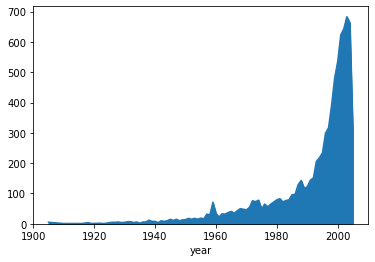

In [66]:
data['title'].groupby(data['year']).count().plot.area()
plt.show()

#### number of movies per country

In [71]:
b = data['country1'].value_counts().head(10)
b

United States     4203
United Kingdom    1061
Japan              608
Canada             373
France             349
unknown            299
Hong Kong          265
India              254
Italy              152
Germany            111
Name: country1, dtype: int64

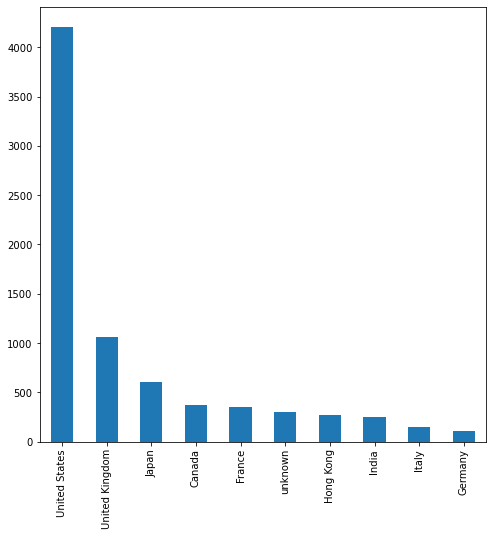

In [72]:
b1 = b.head(10)
if len(b) > 10:
    b1['Other {0}'.format(len(b) - 10)] = sum(b[10:])
b1.plot.bar( figsize=(8, 8))
plt.show()

#### most popular genre per year

In [83]:
# create concat df with genre1 and genre2
df = data[['year', 'vote', 'genre1']]

# groupby table
group_tab = df.groupby(['year', 'genre1'], as_index=False)[['genre1','vote']].agg({'vote':'sum'})

# new df with max count by genre and countries
years = group_tab['year'].unique()
most_votes = pd.DataFrame()

for year in years:
    d = group_tab[(group_tab['year'] == year)]
    d = d[(d['vote'] == d['vote'].max())]
    most_votes = pd.concat([most_votes, d], ignore_index=True)

most_votes.sort_values(by=['year'],ascending = False).head(20)

,year,genre1,vote
90,2005.0,Comedy,832313.0
89,2004.0,Comedy,2538929.0
88,2003.0,Action,6177996.5
87,2002.0,Action,3110702.5
86,2001.0,Drama,1983248.0
85,2000.0,Drama,1890197.5
84,1999.0,Action,3206111.0
83,1998.0,Comedy,3058715.0
82,1997.0,Action,2545961.0
81,1996.0,Action,1188433.0


#### most popular genre per country

In [75]:
# create concat df with genre1 and genre2
df1 = data[['country1', 'title', 'genre1']]

# groupby table
group_tab = df1.groupby(['country1', 'genre1'], as_index=False)[['genre1','title']].agg({'title':'count'})

# new df with max count by genre and countries
countries = group_tab['country1'].unique()
most_genres = pd.DataFrame()

for country in countries:
    d = group_tab[(group_tab['country1'] == country)]
    d = d[(d['title'] == d['title'].max())]
    most_genres = pd.concat([most_genres, d], ignore_index=True)

most_genres.sort_values(by='title',ascending = False).head(20)

,country1,genre1,title
71,United States,Documentary,960
42,Japan,Animation,385
70,United Kingdom,Drama,210
28,Hong Kong,Action,186
24,France,Drama,126
33,India,Drama,96
10,Canada,Drama,89
76,unknown,Documentary,80
39,Italy,Drama,54
4,Australia,Comedy,31


### Encode dataset and export to file

In [33]:
# drop columns irrevelant for encoded data analysis
data_encoded = data.drop(['title','index'], axis=1)

In [34]:
# loop to encode categorical columns
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

categorical = data_encoded.drop(['year', 'rating', 'vote', 'runtime'], axis=1)

for col in data_encoded:
    if col in categorical:
        data_encoded[col] = le.fit_transform(data[col])

In [272]:
# check encoding
data_encoded.head(20)

,year,kind,rating,vote,runtime,genre1,country1,language1,cast1,cast2,director1,writer1
0,2003.0,2,7,474,50.0,6,62,16,867,4968,4121,3319
1,1994.0,7,8,18,83.0,8,62,16,3627,438,3672,5036
2,1992.0,1,5,93,95.0,0,37,33,2513,1667,4077,2610
3,2004.0,1,5,13432,60.0,6,62,16,3047,1545,4022,4892
4,1991.0,1,4,2177,96.0,4,62,16,639,3350,1124,2893
5,1988.0,7,8,81,55.0,6,62,16,3416,4572,1051,2665
6,2005.0,7,4,7153,118.0,0,61,16,4817,5273,3581,3120
7,1990.0,3,7,2898,58.0,0,62,16,3726,4518,1600,4932
8,1972.0,1,6,1818,15.0,1,30,26,1216,4924,3150,2044
9,2001.0,3,7,768,75.0,7,61,16,3615,228,2973,4674


In [35]:
data_encoded.isna().sum()

year         0
kind         0
rating       0
vote         0
runtime      0
genre1       0
country1     0
language1    0
cast1        0
cast2        0
director1    0
writer1      0
dtype: int64

In [36]:
# export clean dataset to csv file
data_encoded.to_csv(r"/Users/maxime/IronHack/Labs/module_3/Project_week_7/Original_files/data_clean_encoded.csv", index = False)

In [37]:
# transform 'rating' to integer
data_encoded.rating = data_encoded.rating.astype(int)

In [38]:
X = data_encoded.drop('rating', axis=1)
y = data_encoded['rating']

In [39]:
# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Models to import

In [41]:
# import models
from sklearn import ensemble, datasets, tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import tree
from sklearn import metrics
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error


In [ ]:
# fitting DecisionTree for reference
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

print('Test accuracy: %.3f' %metrics.accuracy_score(y_test, y_pred))

# BaggingClassifier

Bagging : Training a bunch of models in parallel way. Each model learns from a random subset of the data.

#### Transform target to binary values

In [44]:
y = pd.qcut(data_encoded.rating, 2, labels=[0, 1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Decision Tree Classifier (reference)

In [50]:
# fitting DecisionTree for reference
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

print('Test accuracy: %.3f' %metrics.accuracy_score(y_test, y_pred))

Test accuracy: 0.665


### Feature Selection

In [45]:
# Find the optimal number of features with SFM
SFM = SelectFromModel(estimator=RandomForestClassifier())
s = SFM.fit(X, y)

n_features = s.transform(X).shape[1]
n_features

5

In [46]:
# Get the 7 feature names 
feature_idx = s.get_support()
feature_name = X.columns[feature_idx]
feature_name

Index(['year', 'vote', 'genre1', 'director1', 'writer1'], dtype='object')

In [47]:
# split dataset with features
X = data_encoded[feature_name]

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Fitting BaggingClassifier to the dataset

In [48]:
# fitting BaggingClassifier to the dataset
from sklearn.ensemble import BaggingClassifier

bc = BaggingClassifier()
bc.fit(X_train, y_train)

BaggingClassifier()

In [49]:
# test model
print('Training Accuracy : %.3f'%bc.score(X_train, y_train))
print('Test Accuracy : %.3f'%bc.score(X_test, y_test))

Training Accuracy : 0.983
Test Accuracy : 0.731


With binary target we have a better fit

### Hyperparameter tuning

In [51]:
# GridsearchCV with DecisionTree (default base estimator)
params = {'base_estimator': [None],
         'n_estimators': np.arange(100,400,10)
         }

bc_grid = GridSearchCV(BaggingClassifier(random_state=1), 
                       param_grid = params, 
                       scoring="accuracy", 
                       cv=3, n_jobs=-1, verbose=1)
bc_grid.fit(X_train, y_train)

print(bc_grid.best_params_)
print(bc_grid.best_score_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
{'base_estimator': None, 'n_estimators': 180}
0.7395510966920417


In [52]:
# Accuracy score on test data is still low
bc = BaggingClassifier(n_estimators=180)
bc.fit(X_train, y_train)

print('Training Accuracy : %.3f'%bc.score(X_train, y_train))
print('Test Accuracy : %.3f'%bc.score(X_test, y_test))

Training Accuracy : 0.999
Test Accuracy : 0.748


### with hyperparameter on a different base_estimator

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

params = {'base_estimator': [StandardScaler(), LogisticRegression(random_state=42)],
          'n_estimators': np.arange(100,400,50)}

bagging_classifier_grid = GridSearchCV(BaggingClassifier(random_state=1, n_jobs=-1), 
                                       param_grid=params,
                                       cv=3, n_jobs=-1, verbose=1)
bagging_classifier_grid.fit(X_train, y_train)

print('Train Accuracy : %.3f' %bagging_classifier_grid.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f' %bagging_classifier_grid.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f' %bagging_classifier_grid.best_score_)
print('Best Parameters : ', bagging_classifier_grid.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 500, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py", line 677, in predict
    predicted_probabilitiy = self.predict_proba(X)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py", line 720, in predict_proba
    all_proba = P

  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/fixes.py", line 222, in __call__
    return self.function(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py", line 140, in _parallel_predict_proba
    predictions = estimator.predict(X[:, features])
AttributeError: 'StandardScaler' object has no attribute 'predict'

  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.9/site-packa

  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/fixes.py", line 222, in __call__
    return self.function(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py", line 140, in _parallel_predict_proba
    predictions = estimator.predict(X[:, features])
AttributeError: 'StandardScaler' object has no attribute 'predict'

  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.9/site-packa

Train Accuracy : 0.599
Test Accuracy : 0.596
Best Accuracy Through Grid Search : 0.596
Best Parameters :  {'base_estimator': LogisticRegression(random_state=42), 'n_estimators': 100}


In [54]:
# Accuracy score on test data with hyperparameters
bc = BaggingClassifier(LogisticRegression(random_state=42), n_estimators=100)
bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)

print('Training Accuracy : %.3f' %bc.score(X_train, y_train))
print('Test Accuracy : %.3f' %bc.score(X_test, y_test))

Training Accuracy : 0.597
Test Accuracy : 0.593


The LogisticRegression base estimator is less accurate.

### comparison bagging

# Gradient Boosting Tree

Boosting : Training a bunch of models sequentially. Each model learns from the mistakes of the previous model.

max_depth : # of leaf

n_estimator : # of tree

learning : importance of contribution for each tree (allow to lower the variance)

loss: function is used to detect the residuals

### Feature selection

In [105]:
# define X,y
X = data_encoded.drop('rating', axis=1)
y = data_encoded['rating']

In [106]:
# Get the feature names 
gbt = GradientBoostingRegressor()
SFM = SelectFromModel(estimator=GradientBoostingRegressor())
s = SFM.fit(X, y)

n_features = s.transform(X).shape[1]
n_features
feature_idx = s.get_support()
feature_name = X.columns[feature_idx]
feature_name

Index(['kind', 'vote', 'genre1', 'writer1'], dtype='object')

In [107]:
# split dataset with features
X = data_encoded[feature_name]
y = data_encoded['rating']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### without HP tuning

In [60]:
gbt = GradientBoostingRegressor()
gbt.fit(X_train, y_train)
gbt.score(X_train, y_train)

print('Training Accuracy : %.3f'%gbt.score(X_train, y_train))
print('Test Accuracy : %.3f'%gbt.score(X_test, y_test))

Training Accuracy : 0.441
Test Accuracy : 0.395


#### hyperparameter GridSearchCV

In [110]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Parameters
parameters = {'loss':('ls', 'lad', 'huber', 'quantile'),
              'max_depth':[2,4,6,8],
              'n_estimators':[1,3,5,7,8,10],
              'learning_rate':[0.1, 0.5, 0.7, 1]}

# Gridsearch
grid = GridSearchCV(gbt, parameters)

# Train
grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingRegressor(learning_rate=0.8, max_depth=4,
                                                 n_estimators=8),
             param_grid={'learning_rate': [0.1, 0.5, 0.7, 1],
                         'loss': ('ls', 'lad', 'huber', 'quantile'),
                         'max_depth': [2, 4, 6, 8],
                         'n_estimators': [1, 3, 5, 7, 8, 10]})

In [111]:
# Results
grid.score(X_train, y_train)

0.5282199793360429

In [112]:
# results
grid.best_params_

{'learning_rate': 0.5, 'loss': 'huber', 'max_depth': 6, 'n_estimators': 8}

### Test model with hyperparameter

In [113]:
gbt = GradientBoostingRegressor(loss = 'huber', learning_rate = 0.5, max_depth=6, n_estimators=8)
gbt.fit(X_train, y_train)
gbt.score(X_train, y_train)

0.5287146389391462

In [114]:
print('Training Accuracy : %.3f'%gbt.score(X_train, y_train))
print('Test Accuracy : %.3f'%gbt.score(X_test, y_test))

Training Accuracy : 0.529
Test Accuracy : 0.414


The Gradient Tree Boosting is not a relevant model for our data

# Linear Discriminant Analysis

Linear Discriminant Analysis is a linear model for classification and dimensionality reduction. Most commonly used for feature extraction in pattern classification problems

In [90]:
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [91]:
# define X,y
X = data_encoded.drop('rating', axis=1)
y = data_encoded['rating']

In [92]:
lda = LinearDiscriminantAnalysis()
SFM = SelectFromModel(estimator=LinearDiscriminantAnalysis())
s = SFM.fit(X, y)

n_features = s.transform(X).shape[1]
n_features
feature_idx = s.get_support()
feature_name = X.columns[feature_idx]
feature_name

Index(['kind', 'genre1'], dtype='object')

In [93]:
X = data_encoded[feature_name]

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda.score(X_train, y_train)

# summarize result
print('Training Accuracy : %.3f'%lda.score(X_train, y_train))
print('Test Accuracy : %.3f'%lda.score(X_test, y_test))

Training Accuracy : 0.340
Test Accuracy : 0.345


#### with hyperparamters

In [96]:
# define grid
grid = dict()
grid['solver'] = ['svd', 'lsqr', 'eigen']
# define search
search = GridSearchCV(lda, grid, scoring='accuracy', cv=5, n_jobs=-1)
# perform the search
results = search.fit(X, y)
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Mean Accuracy: 0.337
Config: {'solver': 'svd'}


In [99]:
lda = LinearDiscriminantAnalysis(solver='svd')
lda.fit(X_train, y_train)
lda.score(X_train, y_train)
print('Training Accuracy : %.3f'%lda.score(X_train, y_train))
print('Test Accuracy : %.3f'%lda.score(X_test, y_test))

Training Accuracy : 0.340
Test Accuracy : 0.345
